In [6]:
# Importar dependências
import gempy as gp
import gempy_viewer as gpv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../../3Dmodels/input/BES/interpreted_seismics/GemPy 3.0/"

## Step by step

In [7]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name="Santos_Outer_High_PreSal_Lake_v2.0.0",
    extent=[10000, 35500, 12500, 25500, -3100, -1400],
    resolution=[100, 100, 100],
    importer_helper=gp.data.ImporterHelper(
        #path_to_orientations=data_path + "orientations_points_1_serie.csv",
        path_to_orientations=data_path + "orientations_points_5_series.csv",
        path_to_surface_points=data_path + "surface_points_reduced_v1.csv",
    ),
)

In [19]:
#geo_model.structural_frame

In [8]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Sea_floor": ("sea_floor"),
        "Strat_1": ("h1"),
        "Strat_2": ("h2"),
        "Strat_3": ("h3"),
        "Strat_4": ("h4"),
        "Basement": ("basement",),
    },
)

#geo_model.structural_frame

Could not find element 'basement' in any group.


StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Sea_floor,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=sea_floor,
	color=#443988,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=h1,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=h2,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_3,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=h3,
	color=#ffbe00,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_4,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=h4,
	color=#728f02,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]],

In [21]:
#geo_model.grid

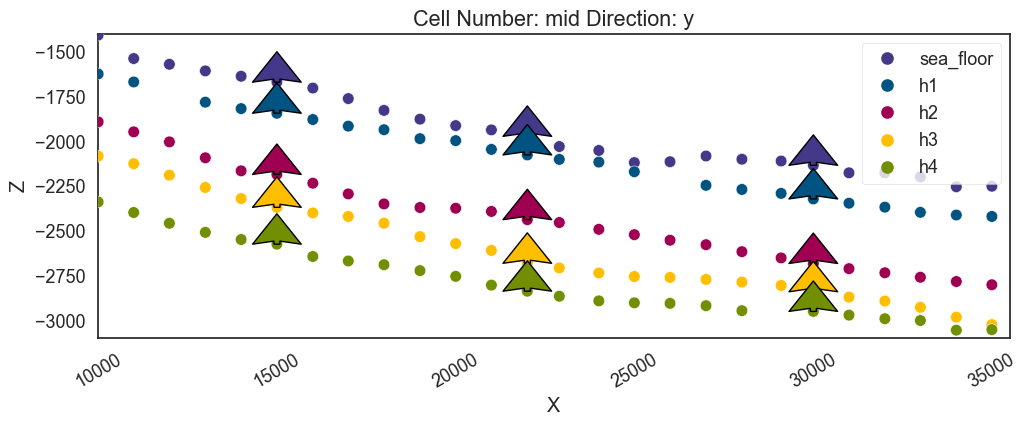

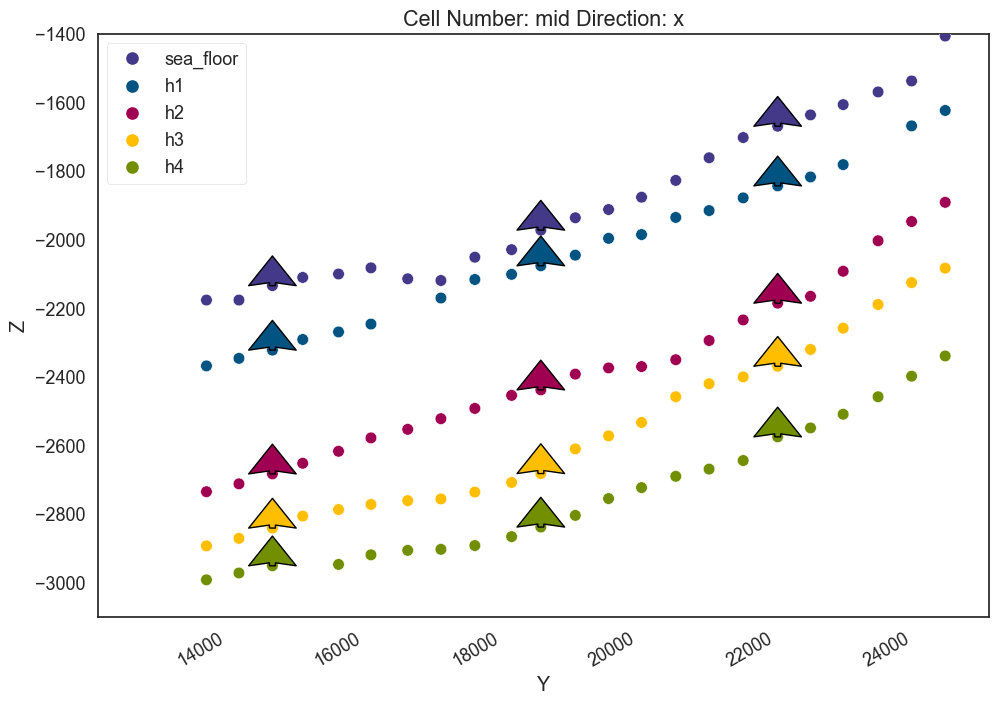

In [9]:
gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=False, ve=5, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=False, ve=5, legend=True)

In [10]:
gempy_vista_model = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    ve=5,
    show_values=False,
    show_block=True,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_model.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

In [5]:
"""gempy_vista_premodel = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    active_scalar_field=None,
    ve=5,
    show_data=True,
    show_results=True,
    show_surfaces=False,
    show_lith=True,
    show_scalar=True,
    show_boundaries=True,
    show_topography=False,
    show_section_trace=True,
    show_values=True,
    show_block=False,
    show=True  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_premodel.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
plotter.show_grid()
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
plotter.border_color = "black" 

# Show the plot
plotter.show"""

<bound method Plotter.show of <pyvista.plotting.plotter.Plotter object at 0x000001EE71054AC0>>

In [8]:
"""bounds = [0.0, 179000.0, 0.0, 148000.0, -20000, 500]

# Calculate midpoints
mid_x = (bounds[0] + bounds[1]) / 2
mid_y = (bounds[2] + bounds[3]) / 2

# Set section grid
gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
        'section1': ([bounds[0], mid_y], [bounds[1], mid_y], [200, 150])
    }
)"""

"bounds = [0.0, 179000.0, 0.0, 148000.0, -20000, 500]\n\n# Calculate midpoints\nmid_x = (bounds[0] + bounds[1]) / 2\nmid_y = (bounds[2] + bounds[3]) / 2\n\n# Set section grid\ngp.set_section_grid(\n    grid=geo_model.grid,\n    section_dict={\n        'section1': ([bounds[0], mid_y], [bounds[1], mid_y], [200, 150])\n    }\n)"

In [9]:
#gpv.plot_section_traces(geo_model)

In [10]:
#bes_series = geo_model.structural_frame.get_group_by_name("Strat_Series")

In [11]:
"""gp.modify_surface_points(
    geo_model=geo_model,
    elements_names=["bes_89", "bes_90", "bes_91", "bes_92", "bes_93", "bes_94", "bes_95", "bes_96", "bes_97", "bes_98", "bes_99", "bes_100"],
    nugget=0.01
)"""

'gp.modify_surface_points(\n    geo_model=geo_model,\n    elements_names=["bes_89", "bes_90", "bes_91", "bes_92", "bes_93", "bes_94", "bes_95", "bes_96", "bes_97", "bes_98", "bes_99", "bes_100"],\n    nugget=0.01\n)'

In [12]:
#geo_model.interpolation_options

In [13]:
"""geo_model.interpolation_options.number_octree_levels = 5
geo_model.interpolation_options.number_octree_levels_surface = 4
geo_model.interpolation_options.kernel_options.range = .8"""

'geo_model.interpolation_options.number_octree_levels = 5\ngeo_model.interpolation_options.number_octree_levels_surface = 4\ngeo_model.interpolation_options.kernel_options.range = .8'

In [14]:
#print(geo_model.structural_frame)

In [11]:
model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH, # Padrão é numpy, só comentar essa parte
        use_gpu=True, # para usar o GPU (não sei se funciona sem CUDA - testar)
        dtype="float64", # "float32"
    ))

Setting Backend To: AvailableBackends.PYTORCH
Condition number: 332838.9473100067.
Condition number: 319857.0501516343.
Condition number: 332886.7888966109.
Condition number: 332880.04268493946.
Condition number: 315264.7988794758.


: 

# Com Pytorch, 
- 70% CPU, 30% GPU e 99% RAM
- Tempo de processamento 5m


Setting Backend To: AvailableBackends.PYTORCH
Condition number: 332838.9473100067.
Condition number: 319857.0501516343.
Condition number: 332886.7888966109.
Condition number: 332880.04268493946.
Condition number: 315264.7988794758.
The Kernel crashed while executing code in the the current cell or a previous cell. Please review the code in the cell(s) to identify a possible cause of the failure. Click here for more info. View Jupyter log for further details.

In [24]:
"""model = gp.compute_model(
    geo_model)"""

Setting Backend To: AvailableBackends.numpy


In [9]:
"""model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH, # Padrão é numpy, só comentar essa parte
        use_gpu=True, # para usar o GPU (não sei se funciona sem CUDA - testar)
        #dtype="float64", "float32"
    ))"""

'model = gp.compute_model(\n    geo_model,\n    engine_config=gp.data.GemPyEngineConfig(\n        backend=gp.data.AvailableBackends.PYTORCH, # Padrão é numpy, só comentar essa parte\n        use_gpu=True, # para usar o GPU (não sei se funciona sem CUDA - testar)\n        #dtype="float64", "float32"\n    ))'

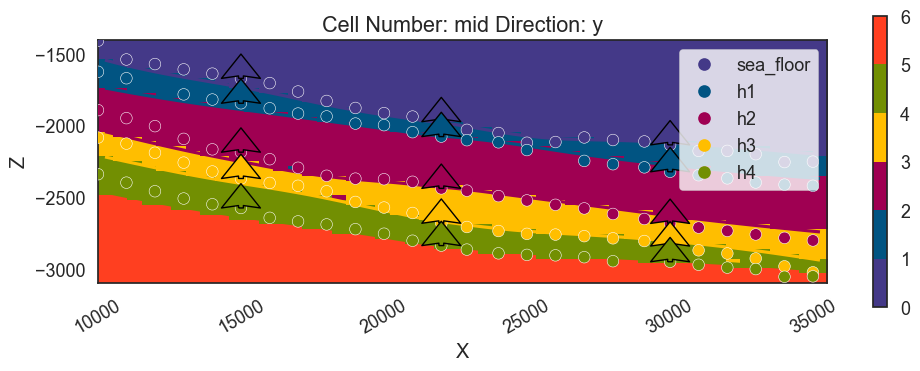

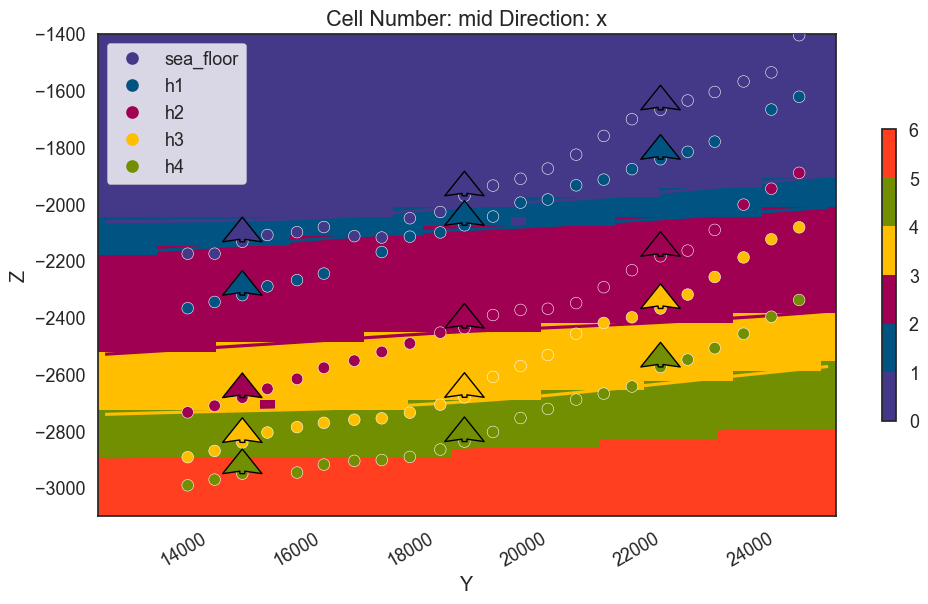

In [6]:
gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=True)

In [7]:
gempy_vista_model = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    ve=5,
    show_values=False,
    show_block=True,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_model.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

In [13]:
gempy_vista_model

In [82]:
"""import pickle
with open('geo_model.pkl', 'wb') as f:
    pickle.dump(geo_model, f)"""

In [ ]:
#gpv.plot_2d(geo_model, show_topography=False, section_names=['meio'], show_lith=True)

In [ ]:
"""gpv.plot_2d(geo_model, cell_number=[4], direction=['y'], show_topography=True, show_data=True)
gpv.plot_2d(geo_model, cell_number=[-4], direction=['y'], show_topography=True, show_data=True)"""

In [ ]:
#gpv.plot_3d(geo_model, show_lith=True, show_topography=False, kwargs_plot_structured_grid={'opacity': 0.8})